In [1]:
from scipy.io import netcdf
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

from calculations import pointwise_similairity

In [2]:
print(pointwise_similairity.__doc__)


    Caluclates point-wise similairity of all points on a map to a reference point over time

    Parameters:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, longitude, lattitude
        x0 (int): X-Component of reference point
        y0 (int): Y-Component of reference point
        level (int): Level on which the similairity should be caluculated
        simFunct (str): The similairity function that should be used. Default: Correlation Coefficient.
                            Options: "corr": Correlation Coefficient, more will follow

    Returns:
        sim (numpy.ndarray): 2 dimensional array with similairity values to reference point
    


In [3]:
nc = netcdf.netcdf_file("data/era-int_pl_1981-mm-u.nc")

In [4]:
#Choose a random point on the map
(x0, y0) = (np.random.randint(256), np.random.randint(512))
(x0, y0)

(251, 243)

In [5]:
#Define Level
level = 15

In [6]:
#Convert map in Array
map_array = np.array(nc.variables["u"][:, :, :, :])
map_array.shape

(12, 37, 256, 512)

In [7]:
#Calculate point-wise similairities to (x0, y0) (Here: Correlation Coefficient)
sim = pointwise_similairity(map_array, x0, y0, level, simFunct="corr")     
            
sim        

array([[-0.2295841 , -0.22776426, -0.22595841, ..., -0.23518794,
        -0.23329913, -0.23142751],
       [-0.21785829, -0.21617825, -0.21458476, ..., -0.22303362,
        -0.22126495, -0.21952928],
       [-0.2022598 , -0.20075975, -0.19931504, ..., -0.20714936,
        -0.20547706, -0.20382455],
       ...,
       [-0.36037351, -0.36110597, -0.36180223, ..., -0.35788465,
        -0.35876784, -0.35961166],
       [-0.477385  , -0.47722815, -0.47700675, ..., -0.47740142,
        -0.47749445, -0.47748393],
       [-0.60054513, -0.59958005, -0.59849194, ..., -0.6028228 ,
        -0.60217302, -0.60140915]])

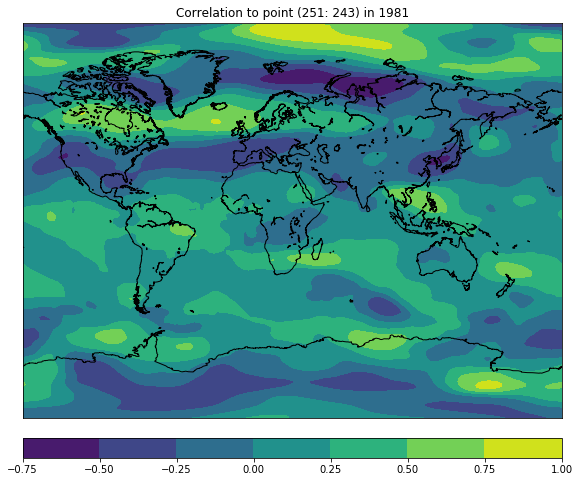

In [8]:
#Plot similairity on map
fig=plt.figure(figsize = (12,8))
m = Basemap(projection='mill',lon_0=30,resolution='l')
m.drawcoastlines()

lons, lats = m.makegrid(512, 256)
x, y = m(lons, lats)

cs = m.contourf(x, y, sim[:, :]) # variate 2nd dimension for different altitudes, -1 is ground level
cbar = m.colorbar(cs,location='bottom',pad="5%")
plt.title("Correlation to point (" + str(x0) + ": " + str(y0) + ") in 1981")
plt.show()